In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
%pip install ipython-sql
# Load the SQL extension
%load_ext sql

# Connect to an in-memory SQLite database
%sql sqlite://

# Create a table and insert your DataFrame into the table
%sql DROP TABLE IF EXISTS players;
%sql PERSIST df;  -- PERSIST allows you to create a table from a DataFrame




Note: you may need to restart the kernel to use updated packages.


 * sqlite://
Done.
 * sqlite://
(sqlite3.OperationalError) near "PERSIST": syntax error
[SQL: PERSIST df;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [3]:
# Replace 'your_file.csv' with the actual file path
file_path = 'SalaryPrediction.csv'

# Read CSV file into a DataFrame
data = pd.read_csv(file_path)


In [4]:
data.shape

(3907, 8)

In [5]:
data.columns

Index(['Wage', 'Age', 'Club', 'League', 'Nation', 'Position', 'Apps', 'Caps'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Wage      3907 non-null   object
 1   Age       3907 non-null   int64 
 2   Club      3907 non-null   object
 3   League    3907 non-null   object
 4   Nation    3907 non-null   object
 5   Position  3907 non-null   object
 6   Apps      3907 non-null   int64 
 7   Caps      3907 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 244.3+ KB


In [7]:
data.describe()

,Age,Apps,Caps
count,3907.000000,3907.000000,3907.000000
mean,24.120553,140.057077,8.926542
std,4.935638,131.694425,20.518234
min,18.000000,0.000000,0.000000
25%,20.000000,15.000000,0.000000
50%,24.000000,115.000000,0.000000
75%,28.000000,224.500000,6.000000
max,41.000000,715.000000,180.000000


In [8]:
data.head()

,Wage,Age,Club,League,Nation,Position,Apps,Caps
0,"46,427,000",23,PSG,Ligue 1 Uber Eats,FRA,Forward,190,57
1,"42,125,000",30,PSG,Ligue 1 Uber Eats,BRA,Midfilder,324,119
2,"34,821,000",35,PSG,Ligue 1 Uber Eats,ARG,Forward,585,162
3,"19,959,000",31,R. Madrid,La Liga,BEL,Forward,443,120
4,"19,500,000",31,Man UFC,Premier League,ESP,Goalkeeper,480,45


In [9]:
data['Club'].unique()

array(['PSG', 'R. Madrid', 'Man UFC', 'Inter', 'Liverpool', 'Chelsea',
       'Man City', 'A. Madrid', 'FC Bayern', 'Barcelona', 'Tottenham',
       'Juventus', 'Nottm Forest', 'A. Bilbao', 'Borussia Dortmund',
       'Capitoline', 'Arsenal', 'RB Leipzig', 'Newcastle', 'Leicester',
       'Sporting CP', 'Everton', 'West Ham', 'Crystal Palace',
       'AS Monaco', 'Aston Villa', 'OGC Nice', 'Lazio', 'Milan', 'LOSC',
       'Bayer 04', 'Parthenope', 'Wolves', 'Sevilla', 'Real Hispalis',
       'Bournemouth', 'Southampton', 'OL', 'Villarreal', 'OM', 'Leeds',
       'Sampdoria', 'Fiorentina', 'Sassuolo', 'Benfica', 'Fulham',
       'Salento', 'Real San Sebastian', 'Salernitana', 'Brighton',
       'Hertha Berlin', 'Valencia', "Borussia M'gladbach", 'Torino',
       'Spezia', 'Getafe', 'Mallorca', 'VfL Wolfsburg', 'Hoffenheim',
       'SV Werder', 'Bologna', 'Brianza', 'Atalanta', 'Strasbourg',
       'Girona', 'Eintracht Frankfurt', 'Vallecano', '1. FC Koln',
       'Verona', 'Rennes', 'Vi

In [10]:
data['Position'].unique()

array(['Forward', 'Midfilder', 'Goalkeeper', 'Defender'], dtype=object)

In [11]:
data['League'].unique()

array(['Ligue 1 Uber Eats', 'La Liga', 'Premier League', 'Serie A',
       'Bundesliga', 'Primiera Liga'], dtype=object)

In [12]:
data['Wage'] = pd.to_numeric(data['Wage'].replace('[,]', '', regex=True), errors='coerce')

data['Wage'] = data['Wage'].astype(int)

In [13]:
figure1 = px.scatter(data, x='Age', y='Wage', color='Age', title='Wage based on age')
figure1.show()

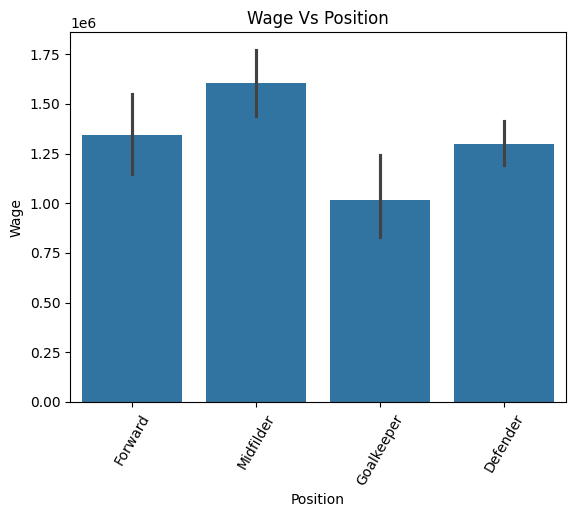

In [14]:
sns.barplot(data, x="Position", y="Wage", dodge = '2')
plt.title('Wage Vs Position')
plt.xticks(rotation=60)
plt.show()

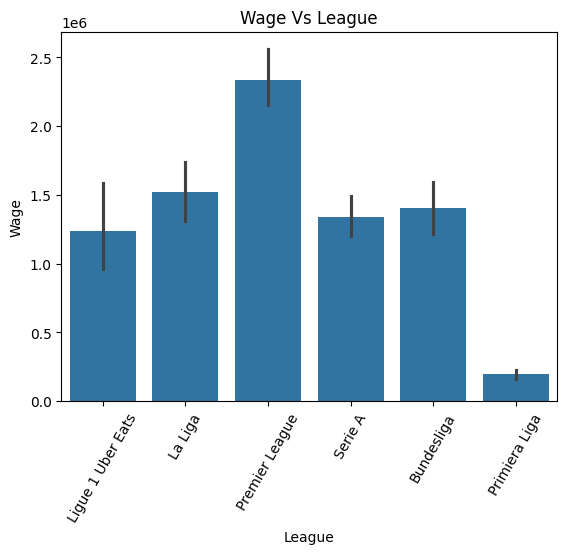

In [15]:
sns.barplot(data, x="League", y="Wage", dodge = '2')
plt.title('Wage Vs League')
plt.xticks(rotation=60)
plt.show()

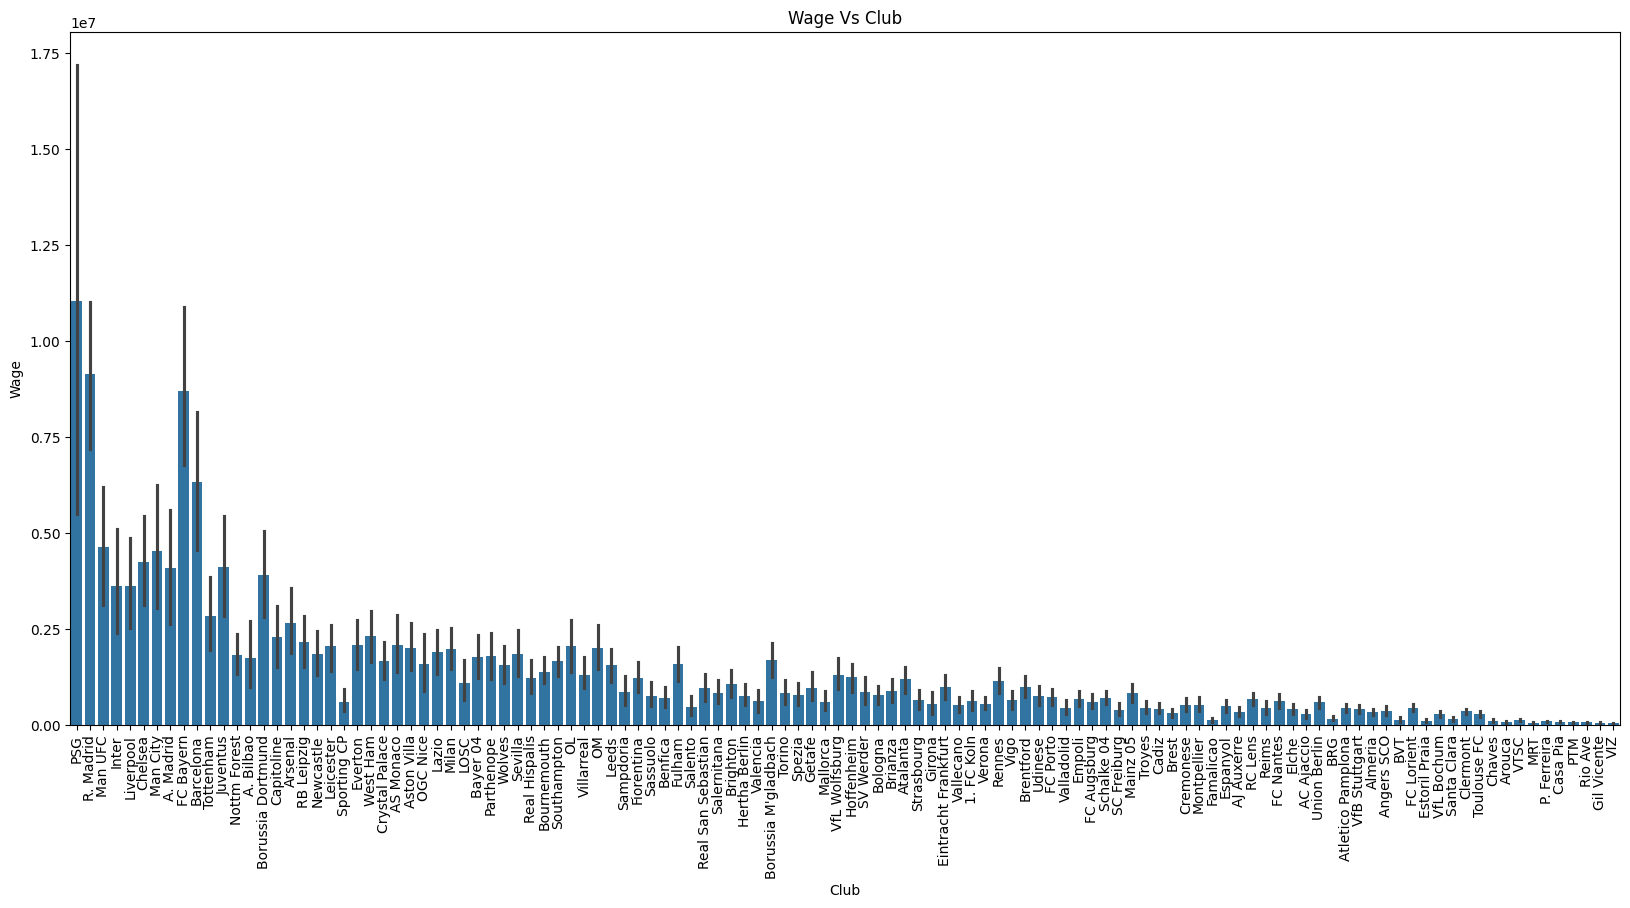

In [16]:
plt.figure(figsize=(20, 9))
sns.barplot(data, x="Club", y="Wage", dodge = '2')
plt.title('Wage Vs Club')
plt.xticks(rotation=90)
plt.show()

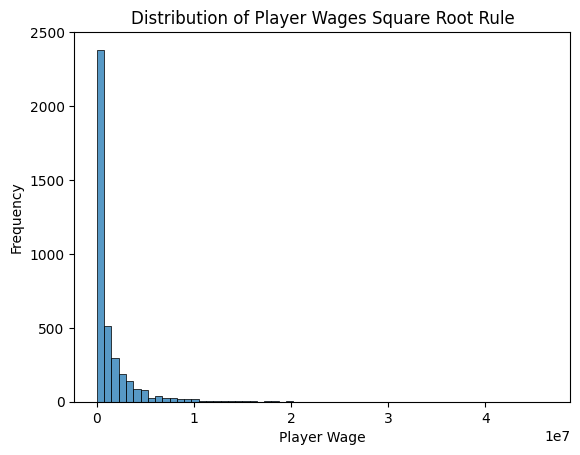

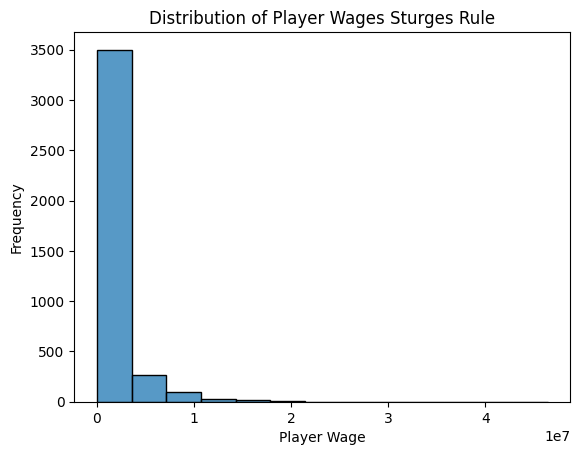

In [17]:
#Square Root Rule:
num_bins = int(np.sqrt(len(data['Wage'])))
sns.histplot(data['Wage'], bins = num_bins , kde=False)  # Adjust the number of bins as needed
plt.xlabel('Player Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Player Wages Square Root Rule')
plt.show()

#Sturges' Rule:
num_bins = int(np.ceil(1 + np.log2(len(data['Wage']))))
sns.histplot(data['Wage'], bins = num_bins , kde=False)  # Adjust the number of bins as needed
plt.xlabel('Player Wage')
plt.ylabel('Frequency')
plt.title('Distribution of Player Wages Sturges Rule')
plt.show()

In [18]:
condition1 = data['League'] == 'Premier League'

Pl_data = data[condition1  ]

In [19]:
Pl_data.shape

(875, 8)

In [20]:
Pl_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 4 to 3893
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Wage      875 non-null    int32 
 1   Age       875 non-null    int64 
 2   Club      875 non-null    object
 3   League    875 non-null    object
 4   Nation    875 non-null    object
 5   Position  875 non-null    object
 6   Apps      875 non-null    int64 
 7   Caps      875 non-null    int64 
dtypes: int32(1), int64(3), object(4)
memory usage: 58.1+ KB


In [21]:
Pl_data.describe

<bound method NDFrame.describe of           Wage  Age          Club          League Nation    Position  Apps  \
4     19500000   31       Man UFC  Premier League    ESP  Goalkeeper   480   
7     18200000   30     Liverpool  Premier League    EGY     Forward   367   
8     18200000   27       Chelsea  Premier League    ENG   Midfilder   326   
9     18200000   29       Man UFC  Premier League    FRA    Defender   287   
10    17680000   31      Man City  Premier League    BEL   Midfilder   399   
...        ...  ...           ...             ...    ...         ...   ...   
3612     21000   18         Leeds  Premier League    ENG   Midfilder     0   
3613     21000   18         Leeds  Premier League    SCO    Defender     0   
3643     19500   19   Bournemouth  Premier League    ENG   Midfilder    11   
3671     18250   19  Nottm Forest  Premier League    ENG   Midfilder     1   
3893      7500   18         Leeds  Premier League    NOR   Midfilder     0   

      Caps  
4       45  
7  

In [22]:
figure1 = px.scatter(Pl_data, x='Age', y='Wage', color='Age', title='Wage based on age')
figure1.show()

In [23]:
# Assuming df is your DataFrame and 'column_name' is the column containing the values you want to filter
column_name = 'Wage'  # Replace with the actual column name

# Calculate Q1, Q3, and IQR
Q1 = Pl_data[column_name].quantile(0.25)
Q3 = Pl_data[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define Lower and Upper Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_PL_data = Pl_data[(Pl_data[column_name] >= lower_bound) & (Pl_data[column_name] <= upper_bound)]

In [24]:
figure1 = px.scatter(filtered_PL_data, x='Age', y='Wage', color='Age', title='Wage based on age')
figure1.show()

In [25]:
use_data = filtered_PL_data.drop(columns=['Apps', 'Caps','League'], errors='ignore')


In [26]:
use_data.info

<bound method DataFrame.info of          Wage  Age          Club Nation   Position
102   8320000   28     Liverpool    SCO   Defender
103   8320000   26      Man City    ESP   Defender
104   8320000   29       Arsenal    GHA  Midfilder
105   8320000   26      Man City    ENG  Midfilder
106   8320000   24     Newcastle    BRA  Midfilder
...       ...  ...           ...    ...        ...
3612    21000   18         Leeds    ENG  Midfilder
3613    21000   18         Leeds    SCO   Defender
3643    19500   19   Bournemouth    ENG  Midfilder
3671    18250   19  Nottm Forest    ENG  Midfilder
3893     7500   18         Leeds    NOR  Midfilder

[832 rows x 5 columns]>

In [27]:
x_train_encoded = pd.get_dummies(use_data, columns=['Position', 'Club'])

In [28]:
x_train_encoded.info

<bound method DataFrame.info of          Wage  Age Nation  Position_Defender  Position_Forward  \
102   8320000   28    SCO               True             False   
103   8320000   26    ESP               True             False   
104   8320000   29    GHA              False             False   
105   8320000   26    ENG              False             False   
106   8320000   24    BRA              False             False   
...       ...  ...    ...                ...               ...   
3612    21000   18    ENG              False             False   
3613    21000   18    SCO               True             False   
3643    19500   19    ENG              False             False   
3671    18250   19    ENG              False             False   
3893     7500   18    NOR              False             False   

      Position_Goalkeeper  Position_Midfilder  Club_Arsenal  Club_Aston Villa  \
102                 False               False         False             False   
103          

In [29]:
# Create a boolean mask for 'Eng'
eng_mask = x_train_encoded['Nation'] == 'ENG'

# Update the 'Nation' column based on the mask
x_train_encoded['Nation'] = eng_mask.astype(int)

In [30]:
x_train_encoded.info

<bound method DataFrame.info of          Wage  Age  Nation  Position_Defender  Position_Forward  \
102   8320000   28       0               True             False   
103   8320000   26       0               True             False   
104   8320000   29       0              False             False   
105   8320000   26       1              False             False   
106   8320000   24       0              False             False   
...       ...  ...     ...                ...               ...   
3612    21000   18       1              False             False   
3613    21000   18       0               True             False   
3643    19500   19       1              False             False   
3671    18250   19       1              False             False   
3893     7500   18       0              False             False   

      Position_Goalkeeper  Position_Midfilder  Club_Arsenal  Club_Aston Villa  \
102                 False               False         False             False   
1

In [31]:
# Assuming df is your DataFrame and "Nation" is the column you want to convert
x_train_encoded['Nation'] = x_train_encoded['Nation'].astype(bool)


In [32]:
wage_column = x_train_encoded['Wage']

# Calculate the mean and standard deviation
mean_wage = wage_column.mean()
std_wage = wage_column.std()

# Print the results
print(f"Mean Wage: {mean_wage}")
print(f"Standard Deviation of Wage: {std_wage}")

Mean Wage: 1844186.5985576923
Standard Deviation of Wage: 2051225.6727726192


In [33]:

"""# Standardize numerical features
numerical_features = ['Wage', 'Age']
scaler = StandardScaler()
x_train_encoded[numerical_features] = scaler.fit_transform(x_train_encoded[numerical_features])

# Display the preprocessed DataFrame
x_train_encoded.head()"""

"# Standardize numerical features\nnumerical_features = ['Wage', 'Age']\nscaler = StandardScaler()\nx_train_encoded[numerical_features] = scaler.fit_transform(x_train_encoded[numerical_features])\n\n# Display the preprocessed DataFrame\nx_train_encoded.head()"

In [34]:
# Assuming df_final is your preprocessed DataFrame with one-hot encoding
X = x_train_encoded.drop('Wage', axis=1)  # Features
y = x_train_encoded['Wage']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (665, 26)
y_train shape: (665,)
X_test shape: (167, 26)
y_test shape: (167,)


In [35]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [36]:
# Display the data types of all columns in X_train
print(y_train.dtype)
print(X_train.dtype)
print(X_train.shape)

float32
float32
(665, 26)


In [37]:
print("X_train:")
print(X_train[:5])

print("\ny_train:")
print(y_train[:5])

X_train:
[[19.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [30.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.  0.  0.  0.  0.  0.]
 [29.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  1.  0.  0.  0.  0.]
 [20.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [26.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]]

y_train:
[ 338000. 2080000.  520000.   52000. 2340000.]


In [38]:
from keras import models, layers, regularizers

# Define the neural network model with L2 regularization
model = models.Sequential()

# Add layers to the model with L2 regularization
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(26,)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.01)))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test))




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13824     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 188417 (736.00 KB)
Trainable params: 18841

Epoch 1/300
42/42 [==============================] - 2s 16ms/step - loss: 7534798176256.0000 - mse: 7534798176256.0000 - val_loss: 7856920199168.0000 - val_mse: 7856920199168.0000
Epoch 2/300
42/42 [==============================] - 0s 7ms/step - loss: 7353333710848.0000 - mse: 7353333710848.0000 - val_loss: 7165658529792.0000 - val_mse: 7165658529792.0000
Epoch 3/300
42/42 [==============================] - 0s 6ms/step - loss: 4974841954304.0000 - mse: 4974841954304.0000 - val_loss: 3761087709184.0000 - val_mse: 3761087709184.0000
Epoch 4/300
42/42 [==============================] - 0s 7ms/step - loss: 3389274193920.0000 - mse: 3389274193920.0000 - val_loss: 3727891890176.0000 - val_mse: 3727891890176.0000
Epoch 5/300
42/42 [==============================] - 0s 7ms/step - loss: 3321588875264.0000 - mse: 3321588875264.0000 - val_loss: 3695256797184.0000 - val_mse: 3695256797184.0000
Epoch 6/300
42/42 [==============================] - 0s 8ms/step - loss: 3298836348928.0000 - mse: 32988

In [39]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


6/6 [==============================] - 0s 2ms/step - loss: 2023175749632.0000 - mse: 2023175749632.0000
Test Loss: [2023175749632.0, 2023175749632.0]


In [40]:
predictions = model.predict(X_test)
# Using type() function
print(type(predictions))

# Using .dtype attribute for NumPy arrays
if isinstance(predictions, np.ndarray):
    print(predictions.dtype)

print("predictions:")
print(predictions[:5])
print(predictions.shape)

6/6 [==============================] - 0s 1ms/step
<class 'numpy.ndarray'>
float32
predictions:
[[  52848.64 ]
 [ 286461.03 ]
 [1719572.4  ]
 [  50995.336]
 [1744156.4  ]]
(167, 1)


In [41]:
"""predictions_originalWage = predictions*std_wage+mean_wage
print(predictions_originalWage[:5])
print(predictions_originalWage.shape)
y_test_original = y_test*std_wage+mean_wage
print(y_test_original)"""


'predictions_originalWage = predictions*std_wage+mean_wage\nprint(predictions_originalWage[:5])\nprint(predictions_originalWage.shape)\ny_test_original = y_test*std_wage+mean_wage\nprint(y_test_original)'

Mean Squared Error: 2023175500000.0
R-squared: 0.5626512701808578


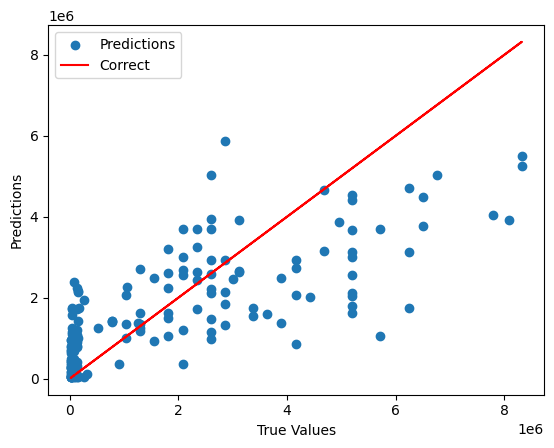

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize predictions vs true values
plt.scatter(y_test, predictions, label="Predictions")
plt.plot(y_test, y_test, color='red', label="Correct")  # Line where x equals y
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()  # Display legend
plt.show()

